### Time Series Analysis of Restaurant visitors

Exogenous Variable: External variable which has correlation with the output. Here Holidays are exogenous variable

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,8)

In [31]:
df=pd.read_csv(r"C:\Users\kanwar\Downloads\rest_vis.csv")

In [3]:
df.head()

,date,weekday,holiday,total
0,1/1/2016,Friday,1,296.0
1,1/2/2016,Saturday,0,191.0
2,1/3/2016,Sunday,0,202.0
3,1/4/2016,Monday,0,105.0
4,1/5/2016,Tuesday,0,98.0


In [4]:
df.shape

(517, 4)

In [6]:
df.isna().sum()

date        0
weekday     0
holiday     0
total      39
dtype: int64

In [8]:
##There are 39 missing values which is the data which needs to be predicted
df.tail(40)

,date,weekday,holiday,total
477,4/22/2017,Saturday,0,226.0
478,4/23/2017,Sunday,0,NaN
479,4/24/2017,Monday,0,NaN
480,4/25/2017,Tuesday,0,NaN
481,4/26/2017,Wednesday,0,NaN
482,4/27/2017,Thursday,0,NaN
483,4/28/2017,Friday,0,NaN
484,4/29/2017,Saturday,0,NaN
485,4/30/2017,Sunday,0,NaN
486,5/1/2017,Monday,0,NaN


In [32]:
df1=df.copy()

In [33]:
df.dropna(inplace=True)

In [28]:
df.isna().sum()

weekday    0
holiday    0
total      0
dtype: int64

In [13]:
49/7 ## 7 weeks

7.0

In [34]:
df['date']=pd.to_datetime(df['date'])
df.set_index('date',inplace=True)
df.head()

,weekday,holiday,total
date,,,
2016-01-01,Friday,1,296.0
2016-01-02,Saturday,0,191.0
2016-01-03,Sunday,0,202.0
2016-01-04,Monday,0,105.0
2016-01-05,Tuesday,0,98.0


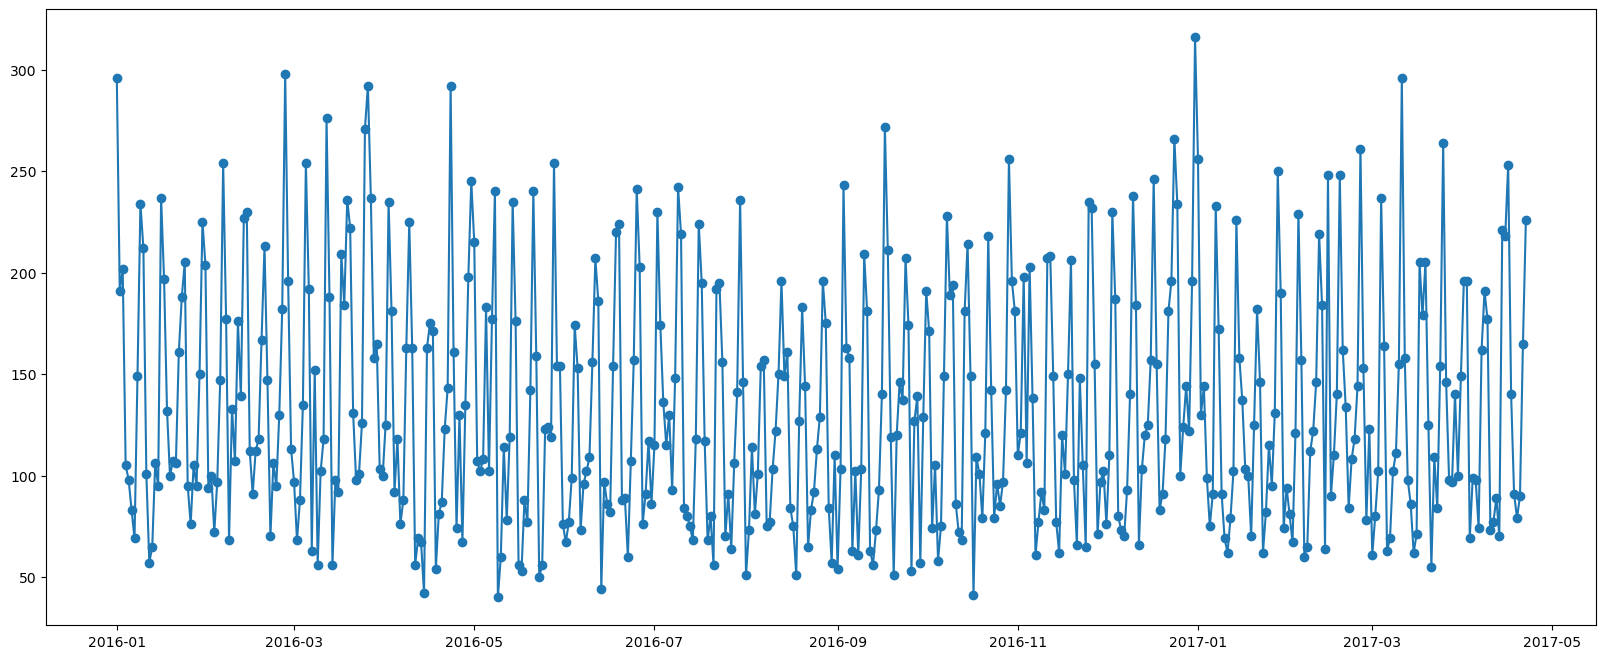

In [35]:
plt.plot(df.index,df['total'],'-o');

In [17]:
## It looks like a stationary series

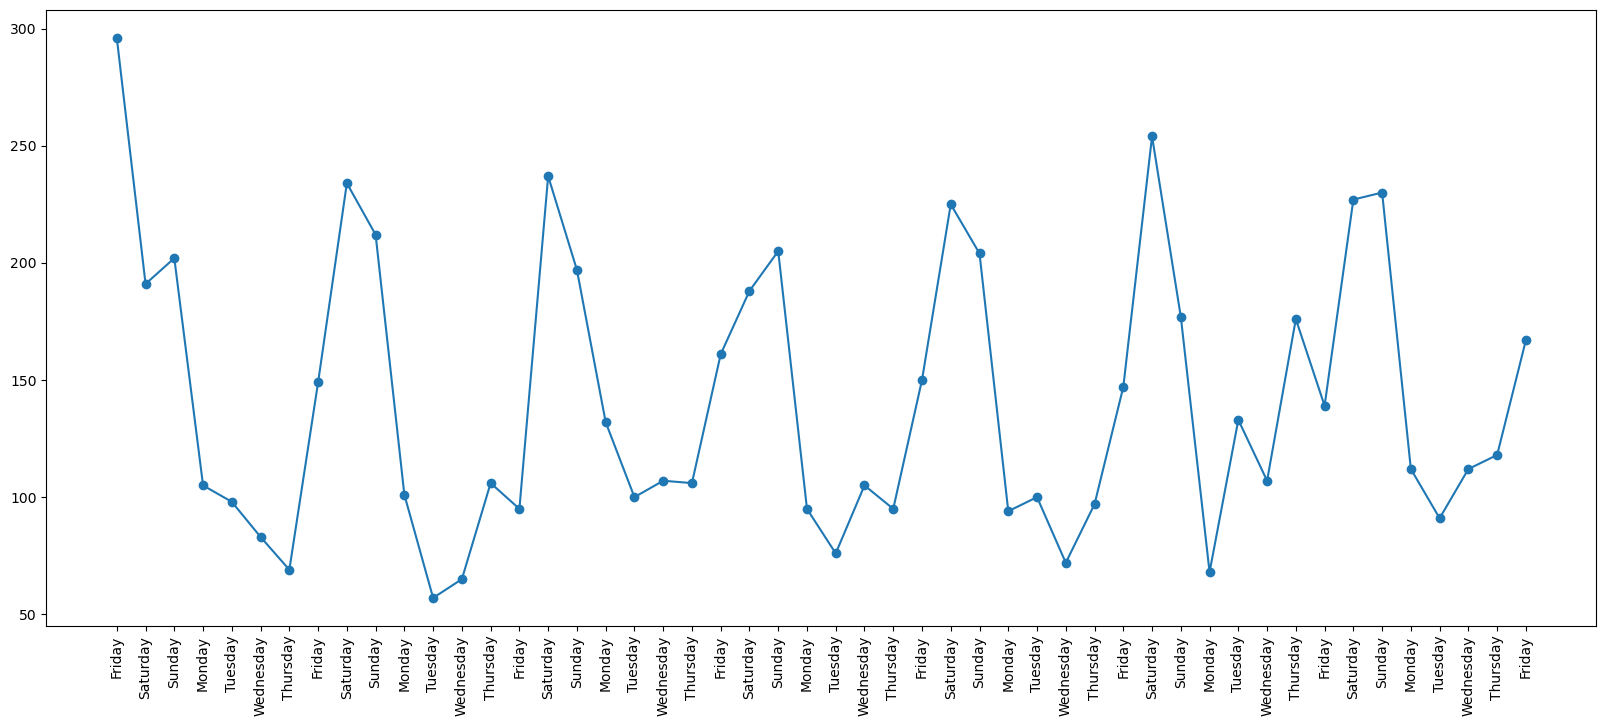

In [36]:
plt.plot(range(50),df['total'][:50], '-o')
plt.xticks(range(0,50), df['weekday'][:50],rotation = 90)
plt.show()

##Check seasonality, weekly seasonality in this data

In [20]:
df.holiday.value_counts()

holiday
0    482
1     35
Name: count, dtype: int64

C:\Users\kanwar\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


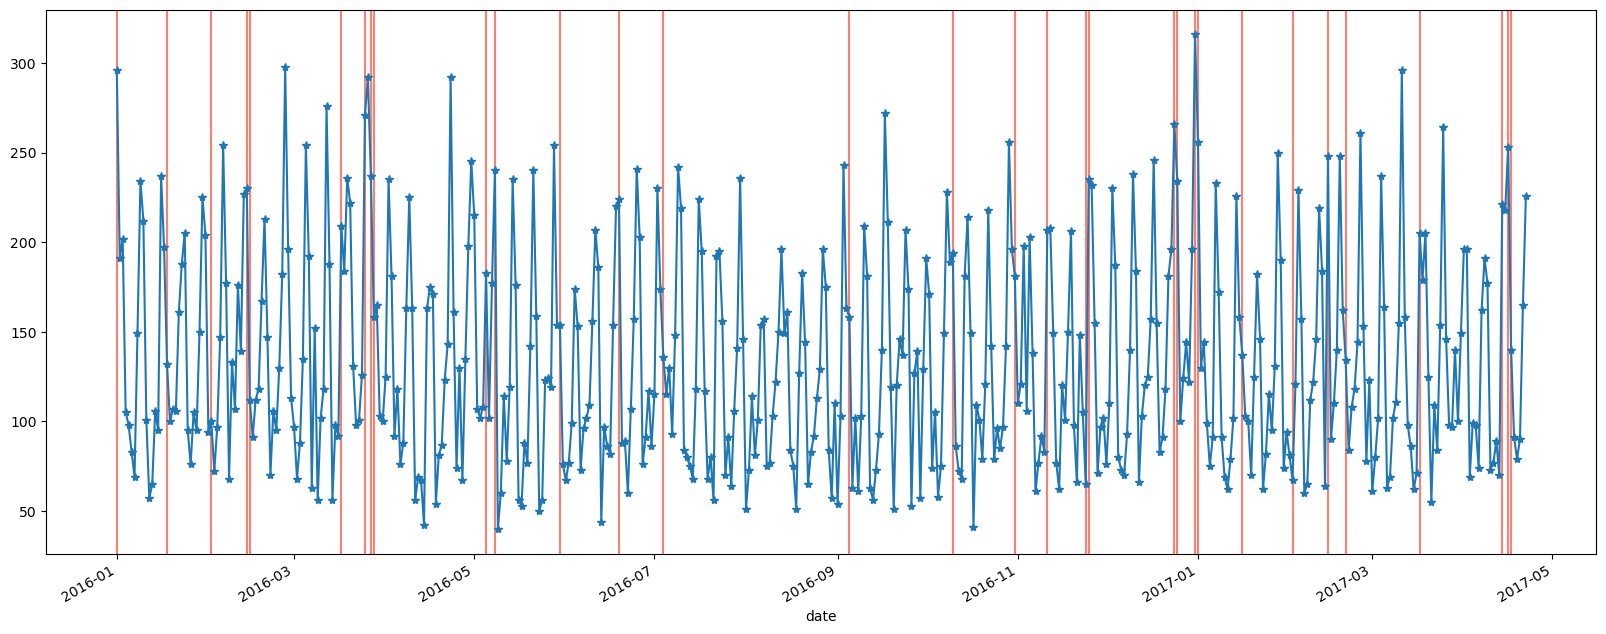

In [37]:
## holidays are iregular intervals

holidays=df.loc[df['holiday']==1].index

for hday in holidays:
    plt.axvline(x=hday, color='#FA8072')

df.total.plot(style='-*')

plt.show()

In [39]:
df.shape

(478, 3)

In [41]:
7*6

42

In [42]:
478-42

436

In [43]:
train = df.iloc[:436]
test = df.iloc[436:]

In [44]:
train.head()

,weekday,holiday,total
date,,,
2016-01-01,Friday,1,296.0
2016-01-02,Saturday,0,191.0
2016-01-03,Sunday,0,202.0
2016-01-04,Monday,0,105.0
2016-01-05,Tuesday,0,98.0


### Without Exog Varible

In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [47]:
model = SARIMAX(train['total'], order=(1,0,1), seasonal_order=(1,0,1,7))  # a simple model
results = model.fit(disp=False)
predictions = results.forecast(42)

C:\Users\kanwar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\kanwar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [49]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape

)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

MAE : 24.668
RMSE : 31.61
MAPE: 0.203


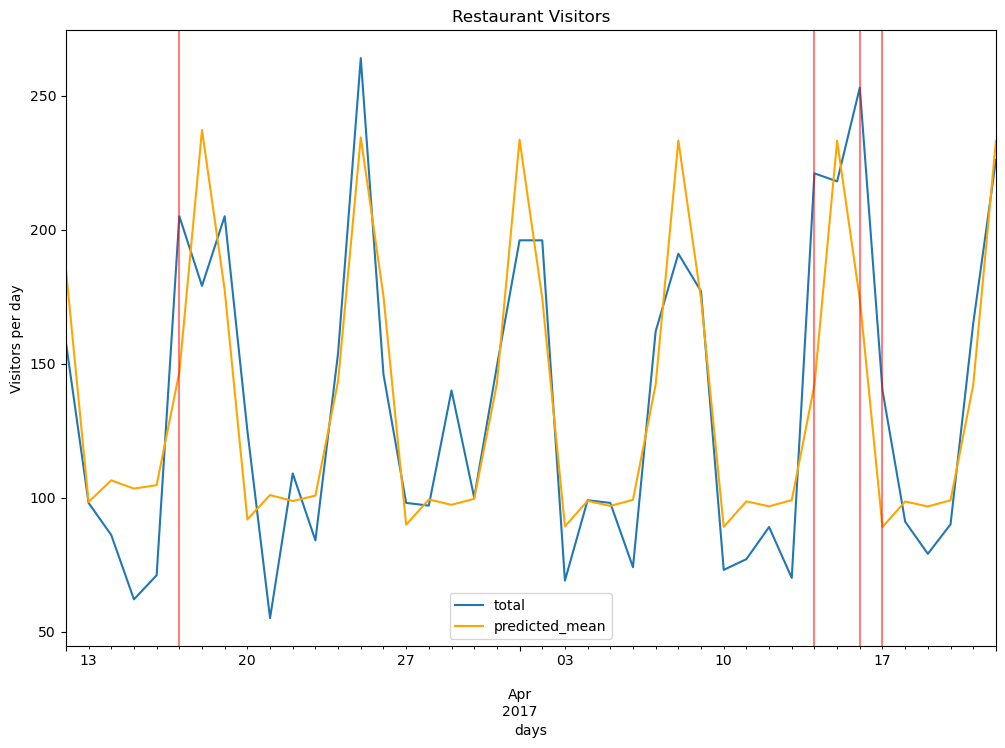

In [50]:
performance(test['total'], predictions)

# Plot predictions against known values

title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel='days'
ax = test['total'].plot(legend=True,figsize=(12,8),title=title)
predictions.plot(legend=True,color = 'orange')

ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test.query('holiday==1').index:
    ax.axvline(x=x, color='red', alpha = 0.5)

### With Exog Variable

In [51]:
model = SARIMAX(train['total'], exog=train['holiday'] ,order=(1,0,1), seasonal_order=(1,0,1,7))  # a simple model
results = model.fit(disp=False)

C:\Users\kanwar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\kanwar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\kanwar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [52]:
predictions = results.forecast(steps = 42,  exog = test[['holiday']])

MAE : 18.481
RMSE : 22.966
MAPE: 0.167


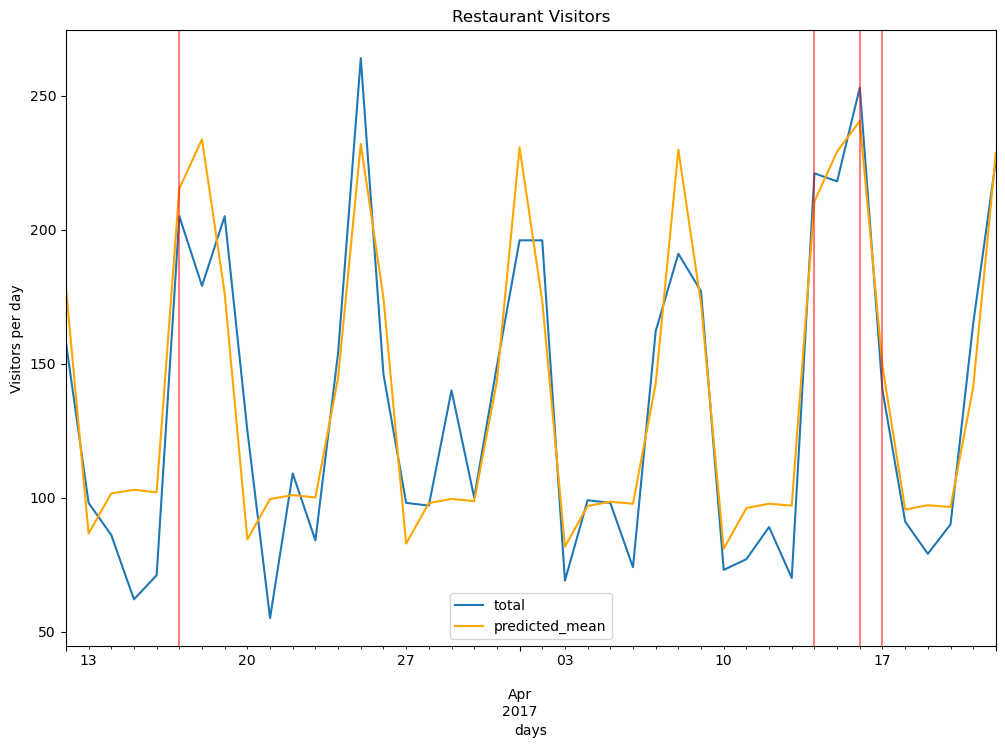

In [53]:
performance(test['total'], predictions)

# Plot predictions against known values

title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel='days'
ax = test['total'].plot(legend=True,figsize=(12,8),title=title)
predictions.plot(legend=True,color = 'orange')

ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test.query('holiday==1').index:
    ax.axvline(x=x, color='red', alpha = 0.5)

In [56]:
actual=[11,13,6,5]
predictions=[5,6.8,8.66,7.862]
performance(actual,predictions)

MAE : 4.431
RMSE : 4.736
MAPE: 0.51


In [60]:
df=pd.read_csv(r"C:\Users\kanwar\Downloads\rest_vis.csv")

In [61]:
df.head()

,date,weekday,holiday,total
0,1/1/2016,Friday,1,296.0
1,1/2/2016,Saturday,0,191.0
2,1/3/2016,Sunday,0,202.0
3,1/4/2016,Monday,0,105.0
4,1/5/2016,Tuesday,0,98.0


In [62]:
df['date']=pd.to_datetime(df['date'])

In [66]:
df['weekend']=np.where(((df['weekday']=='Sunday') |(df['weekday']=='Saturday')),1,0)

In [67]:
df.head()

,date,weekday,holiday,total,weekend
0,2016-01-01,Friday,1,296.0,0
1,2016-01-02,Saturday,0,191.0,1
2,2016-01-03,Sunday,0,202.0,1
3,2016-01-04,Monday,0,105.0,0
4,2016-01-05,Tuesday,0,98.0,0


In [68]:
for i in range(1,32):
    df["Lag{}".format(i)]=df.total.shift(i)

In [69]:
df.head()

,date,weekday,holiday,total,weekend,Lag1,Lag2,Lag3,Lag4,Lag5,...,Lag22,Lag23,Lag24,Lag25,Lag26,Lag27,Lag28,Lag29,Lag30,Lag31
0,2016-01-01,Friday,1,296.0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-02,Saturday,0,191.0,1,296.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-03,Sunday,0,202.0,1,191.0,296.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-04,Monday,0,105.0,0,202.0,191.0,296.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-05,Tuesday,0,98.0,0,105.0,202.0,191.0,296.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
lis=["Lag{}".format(i) for i in range(1,32)]

df.dropna(inplace=True)
df['last_month_avg_level']=df.loc[:,lis].sum(axis=1)/31

In [72]:
lis = ['Lag{}'.format(i) for i in range(1,8)]

df['last_week_avg_level'] = df.loc[:,lis].sum(axis=1)/7
df.head()

,date,weekday,holiday,total,weekend,Lag1,Lag2,Lag3,Lag4,Lag5,...,Lag24,Lag25,Lag26,Lag27,Lag28,Lag29,Lag30,Lag31,last_month_avg_level,last_week_avg_level
31,2016-02-01,Monday,0,94.0,0,204.0,225.0,150.0,95.0,105.0,...,149.0,69.0,83.0,98.0,105.0,202.0,191.0,296.0,143.419355,135.714286
32,2016-02-02,Tuesday,1,100.0,0,94.0,204.0,225.0,150.0,95.0,...,234.0,149.0,69.0,83.0,98.0,105.0,202.0,191.0,136.903226,135.571429
33,2016-02-03,Wednesday,0,72.0,0,100.0,94.0,204.0,225.0,150.0,...,212.0,234.0,149.0,69.0,83.0,98.0,105.0,202.0,133.967742,139.000000
34,2016-02-04,Thursday,0,97.0,0,72.0,100.0,94.0,204.0,225.0,...,101.0,212.0,234.0,149.0,69.0,83.0,98.0,105.0,129.774194,134.285714
35,2016-02-05,Friday,0,147.0,0,97.0,72.0,100.0,94.0,204.0,...,57.0,101.0,212.0,234.0,149.0,69.0,83.0,98.0,129.516129,134.571429


In [73]:
lis = ["Lag{}".format(i) for i in range(1,15)]
df['last_2week_avg_level'] = df.loc[:,lis].sum(axis = 1)/14
df.head(3)

,date,weekday,holiday,total,weekend,Lag1,Lag2,Lag3,Lag4,Lag5,...,Lag25,Lag26,Lag27,Lag28,Lag29,Lag30,Lag31,last_month_avg_level,last_week_avg_level,last_2week_avg_level
31,2016-02-01,Monday,0,94.0,0,204.0,225.0,150.0,95.0,105.0,...,69.0,83.0,98.0,105.0,202.0,191.0,296.0,143.419355,135.714286,139.214286
32,2016-02-02,Tuesday,1,100.0,0,94.0,204.0,225.0,150.0,95.0,...,149.0,69.0,83.0,98.0,105.0,202.0,191.0,136.903226,135.571429,136.500000
33,2016-02-03,Wednesday,0,72.0,0,100.0,94.0,204.0,225.0,150.0,...,234.0,149.0,69.0,83.0,98.0,105.0,202.0,133.967742,139.000000,136.500000


In [74]:
df['dayofweek'] = df['date'].dt.dayofweek

df['visit_wrt_dow'] = df.groupby('dayofweek')['total'].transform('mean')
df[['visit_wrt_dow', 'dayofweek']].drop_duplicates()

,visit_wrt_dow,dayofweek
31,89.593750,0
32,94.531250,1
33,94.687500,2
34,99.015625,3
35,147.171875,4
36,229.125000,5
37,178.460317,6


In [76]:
df.head(10)

,date,weekday,holiday,total,weekend,Lag1,Lag2,Lag3,Lag4,Lag5,...,Lag27,Lag28,Lag29,Lag30,Lag31,last_month_avg_level,last_week_avg_level,last_2week_avg_level,dayofweek,visit_wrt_dow
31,2016-02-01,Monday,0,94.0,0,204.0,225.0,150.0,95.0,105.0,...,98.0,105.0,202.0,191.0,296.0,143.419355,135.714286,139.214286,0,89.593750
32,2016-02-02,Tuesday,1,100.0,0,94.0,204.0,225.0,150.0,95.0,...,83.0,98.0,105.0,202.0,191.0,136.903226,135.571429,136.500000,1,94.531250
33,2016-02-03,Wednesday,0,72.0,0,100.0,94.0,204.0,225.0,150.0,...,69.0,83.0,98.0,105.0,202.0,133.967742,139.000000,136.500000,2,94.687500
34,2016-02-04,Thursday,0,97.0,0,72.0,100.0,94.0,204.0,225.0,...,149.0,69.0,83.0,98.0,105.0,129.774194,134.285714,134.000000,3,99.015625
35,2016-02-05,Friday,0,147.0,0,97.0,72.0,100.0,94.0,204.0,...,234.0,149.0,69.0,83.0,98.0,129.516129,134.571429,133.357143,4,147.171875
36,2016-02-06,Saturday,0,254.0,1,147.0,97.0,72.0,100.0,94.0,...,212.0,234.0,149.0,69.0,83.0,131.096774,134.142857,132.357143,5,229.125000
37,2016-02-07,Sunday,0,177.0,1,254.0,147.0,97.0,72.0,100.0,...,101.0,212.0,234.0,149.0,69.0,136.612903,138.285714,137.071429,6,178.460317
38,2016-02-08,Monday,0,68.0,0,177.0,254.0,147.0,97.0,72.0,...,57.0,101.0,212.0,234.0,149.0,140.096774,134.428571,135.071429,0,89.593750
39,2016-02-09,Tuesday,0,133.0,0,68.0,177.0,254.0,147.0,97.0,...,65.0,57.0,101.0,212.0,234.0,137.483871,130.714286,133.142857,1,94.531250
40,2016-02-10,Wednesday,0,107.0,0,133.0,68.0,177.0,254.0,147.0,...,106.0,65.0,57.0,101.0,212.0,134.225806,135.428571,137.214286,2,94.687500


In [78]:
df.columns

Index(['date', 'weekday', 'holiday', 'total', 'weekend', 'Lag1', 'Lag2',
       'Lag3', 'Lag4', 'Lag5', 'Lag6', 'Lag7', 'Lag8', 'Lag9', 'Lag10',
       'Lag11', 'Lag12', 'Lag13', 'Lag14', 'Lag15', 'Lag16', 'Lag17', 'Lag18',
       'Lag19', 'Lag20', 'Lag21', 'Lag22', 'Lag23', 'Lag24', 'Lag25', 'Lag26',
       'Lag27', 'Lag28', 'Lag29', 'Lag30', 'Lag31', 'last_month_avg_level',
       'last_week_avg_level', 'last_2week_avg_level', 'dayofweek',
       'visit_wrt_dow'],
      dtype='object')

In [80]:
df = df[['total',  'Lag1', 'Lag2','Lag3', 'last_month_avg_level', 'last_week_avg_level',
          'last_2week_avg_level', 'visit_wrt_dow', 'weekend','holiday']]

In [81]:
df.head()

,total,Lag1,Lag2,Lag3,last_month_avg_level,last_week_avg_level,last_2week_avg_level,visit_wrt_dow,weekend,holiday
31,94.0,204.0,225.0,150.0,143.419355,135.714286,139.214286,89.593750,0,0
32,100.0,94.0,204.0,225.0,136.903226,135.571429,136.500000,94.531250,0,1
33,72.0,100.0,94.0,204.0,133.967742,139.000000,136.500000,94.687500,0,0
34,97.0,72.0,100.0,94.0,129.774194,134.285714,134.000000,99.015625,0,0
35,147.0,97.0,72.0,100.0,129.516129,134.571429,133.357143,147.171875,0,0


In [82]:
train = df.iloc[:df.shape[0]-42].dropna()
test = df.iloc[df.shape[0]-42:]

In [83]:
X_train = train.drop(["total"],axis =1)
y_train = train['total']

X_test = test.drop(["total"],axis =1)
y_test = test['total']

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error as mape

In [85]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [86]:
pred = model.predict(X_test)
# y_test

In [87]:
y_pred = pd.Series(pred,index = test.index)
y_pred.head()

436    176.295251
437     78.206591
438     97.059241
439     93.649415
440     93.657530
dtype: float64

In [88]:
mape(test['total'], y_pred)

0.15995150037337078

In [89]:
# NY Taxi fare prediction (time series)
# GBDT applied
# https://www.kaggle.com/competitions/new-york-city-taxi-fare-prediction

In [90]:
!pip install pystan~=2.14

!pip install prophet

     ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
     ---- ----------------------------------- 1.8/16.2 MB 11.9 MB/s eta 0:00:02
     ----------- ---------------------------- 4.5/16.2 MB 11.3 MB/s eta 0:00:02
     ---------------- ----------------------- 6.6/16.2 MB 10.8 MB/s eta 0:00:01
     ---------------------- ----------------- 8.9/16.2 MB 10.7 MB/s eta 0:00:01
     --------------------------- ----------- 11.3/16.2 MB 10.9 MB/s eta 0:00:01
     --------------------------------- ----- 13.9/16.2 MB 11.1 MB/s eta 0:00:01
     --------------------------------------  16.0/16.2 MB 11.0 MB/s eta 0:00:01
     --------------------------------------- 16.2/16.2 MB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
      exec(compile('''
      ~~~~^^^^^^^^^^^^
      # This is <pip-setuptools-caller> -- a caller that pip uses to run setup.py
      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
      ...<32 lines>...
      exec(compile(setup_py_code, filename, "exec"))
      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
      ''' % ('C:\\Users\\kanwar\\AppData\\Local\\Temp\\pip-install-0gexhj3v\\pystan_39159d40d62c4a918a8412c7f825da7b\\setup.py',), "<pip-setuptools-caller>", "exec"))
      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "<pip-setuptools-caller>", line 35, in <module>
    File "C:\Users\kanwar\AppData\Local\Temp\pip-install-

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ------ --------------------------------- 2.1/13.3 MB 11.2 MB/s eta 0:00:02
   ----------- ---------------------------- 3.7/13.3 MB 10.7 MB/s eta 0:00:01
   ------------------ --------------------- 6.3/13.3 MB 10.2 MB/s eta 0:00:01
   ------------------------- -------------- 8.4/13.3 MB 10.2 MB/s eta 0:00:01
   ----------------------------- ---------- 10.0/13.3 MB 10.0 MB/s eta 0:00:01
   --------------------------------- ------ 11.3/13.3 MB 9.0 MB/s eta 0:00:01
   ---------------------------------------  13.1/13.3 MB 9.4 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 9.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 1.2/1.2 MB 6.9 MB/s eta 0:00:00

   -------- ------------------------------- 1/5 [importlib_resources]
   -------- ------------------------------- 1/5 [importlib_resources]
   -------- -------

In [91]:
from prophet import Prophet

In [92]:
df = df1.copy()
df.head()

,date,weekday,holiday,total
0,1/1/2016,Friday,1,296.0
1,1/2/2016,Saturday,0,191.0
2,1/3/2016,Sunday,0,202.0
3,1/4/2016,Monday,0,105.0
4,1/5/2016,Tuesday,0,98.0


In [93]:
# df[['ds', 'y', 'extra1', 'extra2', 'extra3']]


df['ds'] = pd.to_datetime(df['date'])
df['y'] = df['total']
df = df[['ds', 'y', 'holiday']] # prophet need specific names.

df.head()

,ds,y,holiday
0,2016-01-01,296.0,1
1,2016-01-02,191.0,0
2,2016-01-03,202.0,0
3,2016-01-04,105.0,0
4,2016-01-05,98.0,0


In [94]:
m = Prophet()
m.fit(df[['ds', 'y']][:-39])

future = m.make_future_dataframe(periods=39, freq="D")
forecast = m.predict(future)
forecast.head()

21:02:06 - cmdstanpy - INFO - Chain [1] start processing
21:02:08 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,143.018440,117.532778,199.517484,143.018440,143.018440,15.209684,15.209684,15.209684,15.209684,15.209684,15.209684,0.0,0.0,0.0,158.228124
1,2016-01-02,142.946140,195.383679,280.181593,142.946140,142.946140,94.500797,94.500797,94.500797,94.500797,94.500797,94.500797,0.0,0.0,0.0,237.446937
2,2016-01-03,142.873839,148.118497,231.143647,142.873839,142.873839,46.766092,46.766092,46.766092,46.766092,46.766092,46.766092,0.0,0.0,0.0,189.639931
3,2016-01-04,142.801539,57.827508,137.804868,142.801539,142.801539,-42.868527,-42.868527,-42.868527,-42.868527,-42.868527,-42.868527,0.0,0.0,0.0,99.933012
4,2016-01-05,142.729238,64.097121,145.684998,142.729238,142.729238,-39.704575,-39.704575,-39.704575,-39.704575,-39.704575,-39.704575,0.0,0.0,0.0,103.024663


<Axes: >

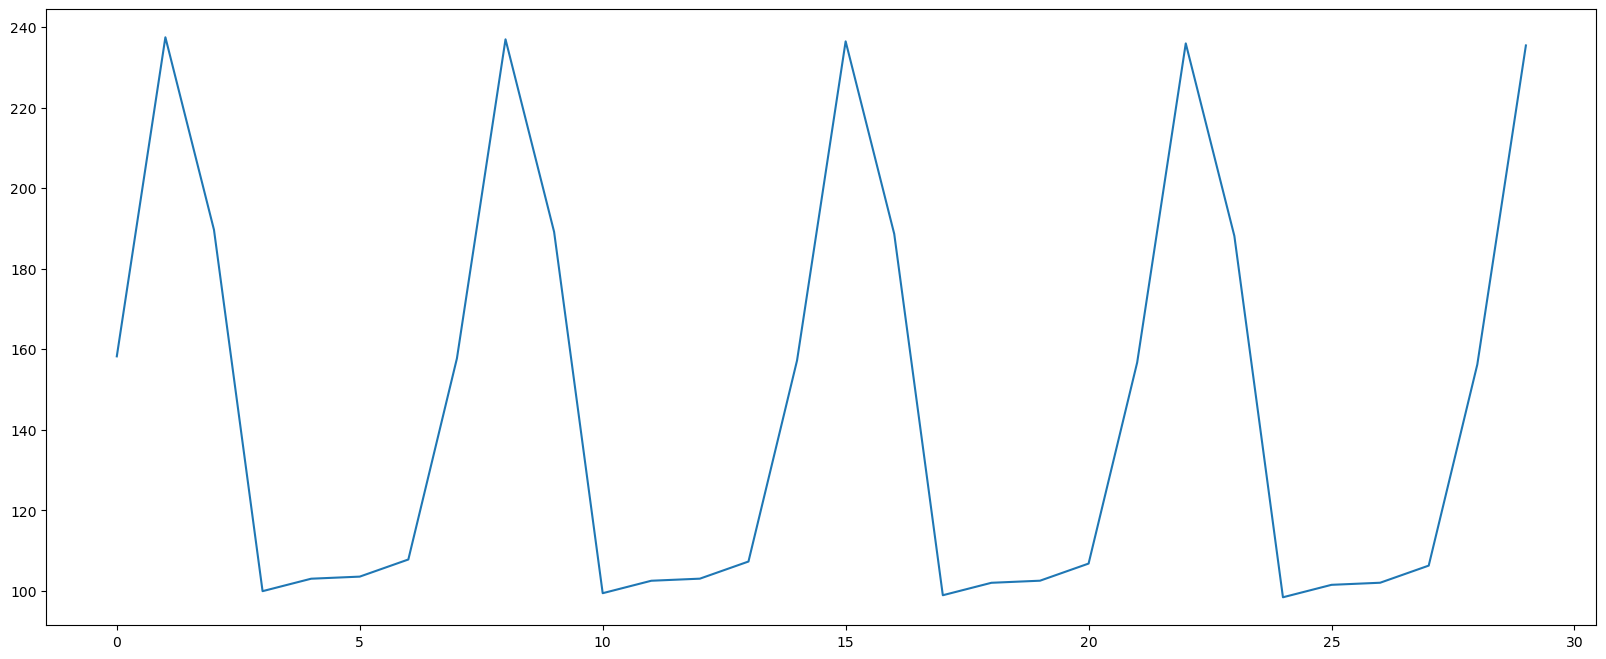

In [95]:
forecast['yhat'][:30].plot()

<Axes: >

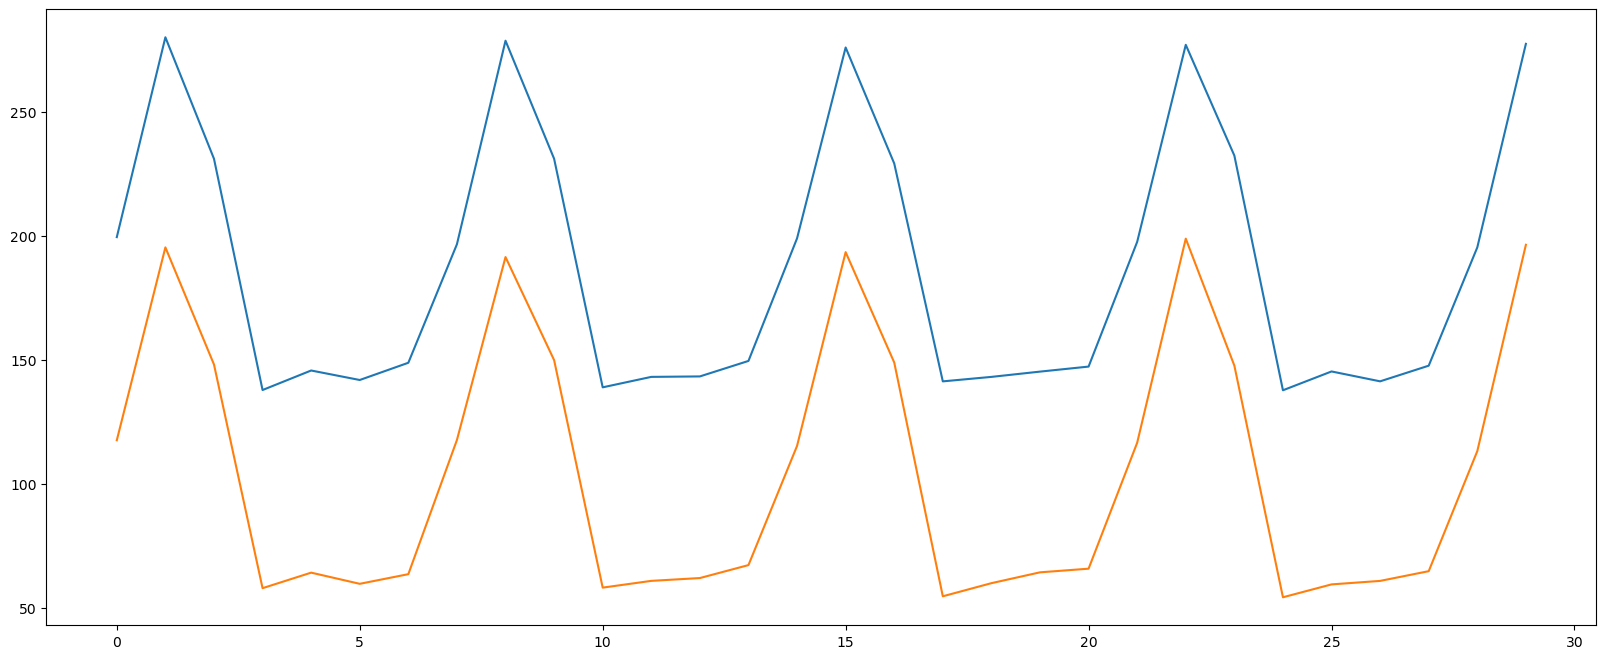

In [96]:
forecast['yhat_upper'][:30].plot()
forecast['yhat_lower'][:30].plot()

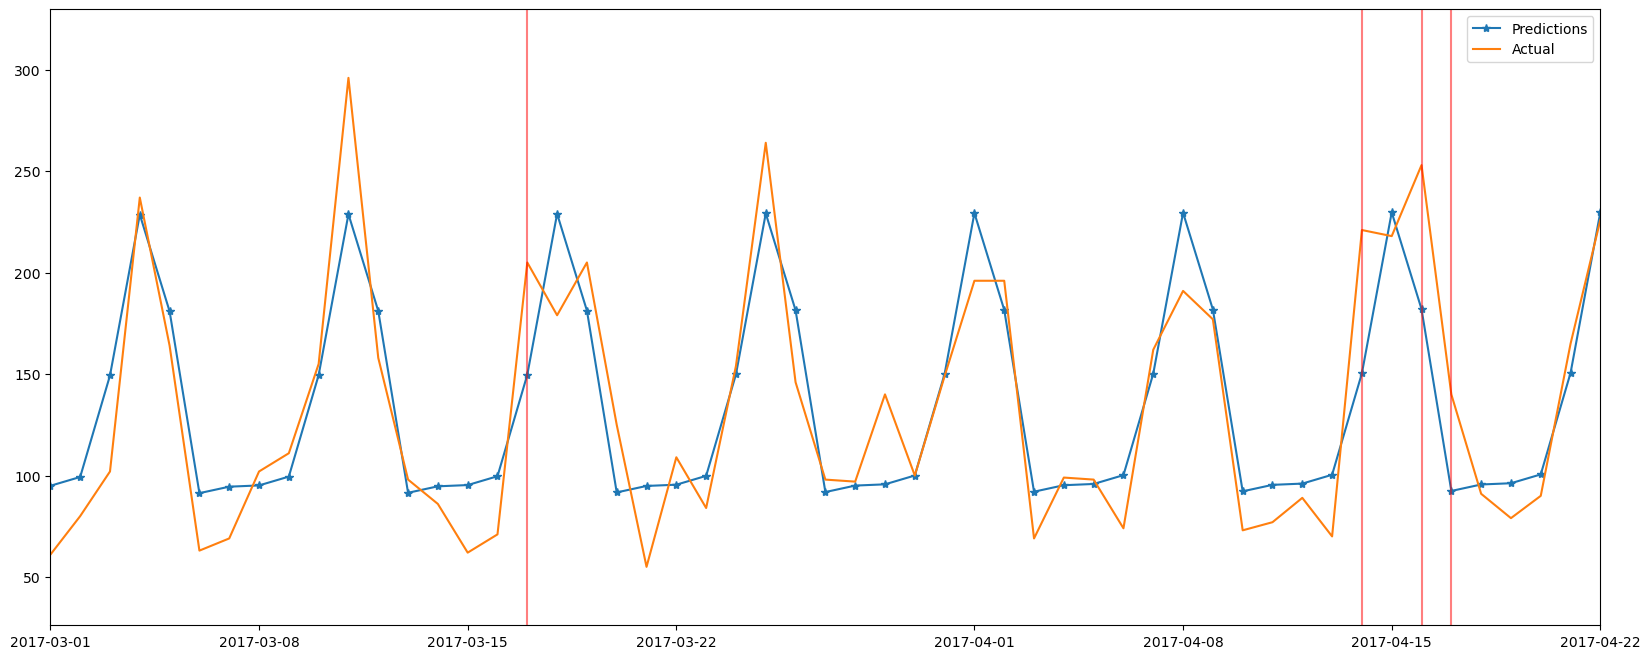

In [97]:
plt.plot(forecast['ds'], forecast['yhat'],'-*', label = 'Predictions')
plt.plot(df['ds'], df['y'], label = 'Actual')

for x in df.query('holiday==1')['ds']:
    plt.axvline(x=x, color='red', alpha = 0.5);

plt.xlim(pd.to_datetime('2017-03-01'), pd.to_datetime('2017-04-22'))
plt.legend()

In [98]:
model2 = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model2.add_regressor('holiday') #adding exog-> holidays data in the model2


model2.fit(df[:-39])
forecast2 = model2.predict(df)

21:10:32 - cmdstanpy - INFO - Chain [1] start processing
21:10:33 - cmdstanpy - INFO - Chain [1] done processing


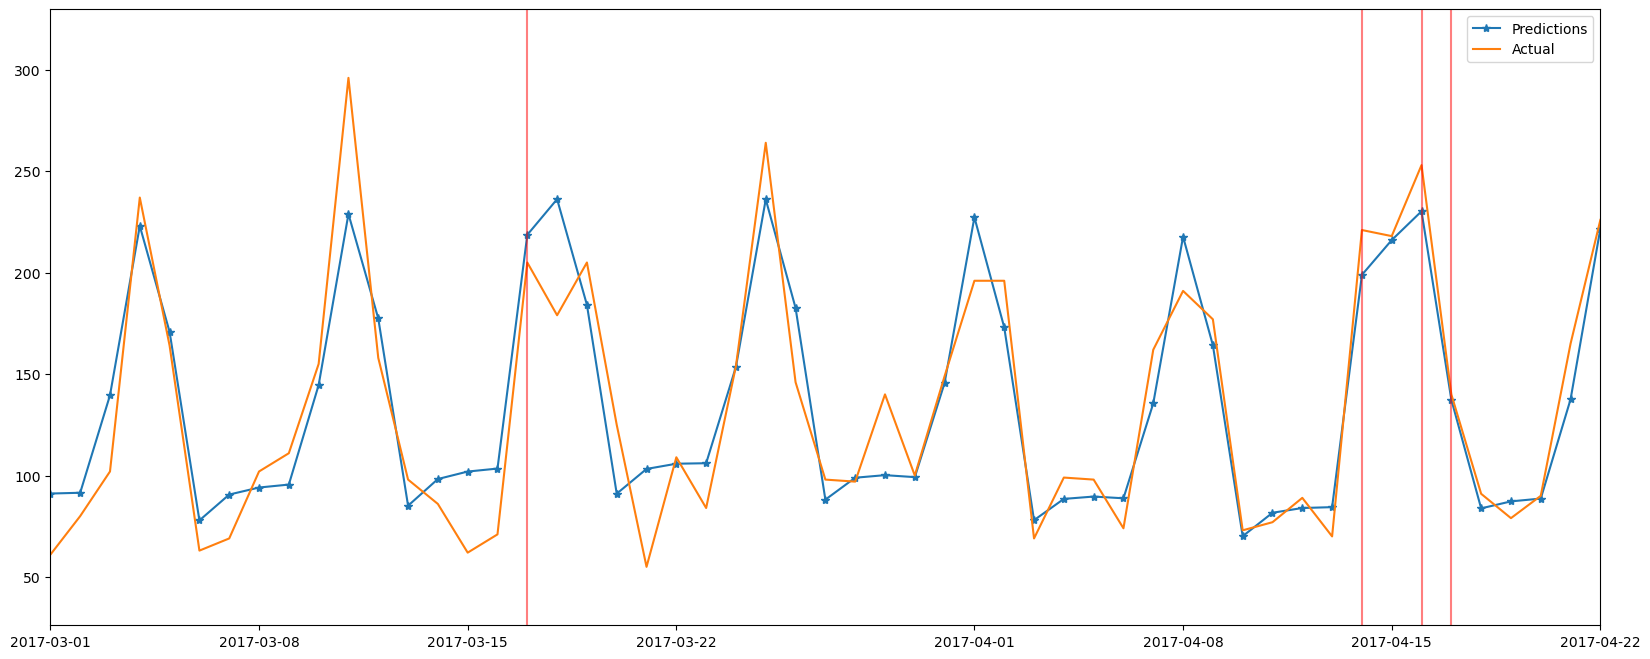

In [99]:
plt.plot(forecast2['ds'], forecast2['yhat'],'-*', label = 'Predictions')
plt.plot(df['ds'], df['y'], label = 'Actual')
for x in df.query('holiday==1')['ds']:
    plt.axvline(x=x, color='red', alpha = 0.5);
plt.xlim(pd.to_datetime('2017-03-01'), pd.to_datetime('2017-04-22'))
plt.legend()